ELISE Jean-Pierre  

SCHROLL Louis



# Contextualisation

Un microbiote correspond à l’ensemble des microorganismes vivant au sein d’un organisme donné. Le terme est généralement réservé pour décrire les microorganismes non pathogènes, avec lesquels l’organisme entretient des relations mutualistes. Chez *H. Sapiens*, le microbiote intestinal a fait l’objet d’un nombre croissant d’études puisqu’il s’est avéré important pour la santé de l’hôte. Par exemple, le microbiote intestinal permet un meilleur apport de nutriments pour l’hôte, assure une forme de protection contre les pathogènes, et impacte le développement du système immunitaire <sup>[refs]</sup>. 

Des travaux expérimentaux <sup>[refs]</sup> montrent que les communautés microbiennes varient d’un individu à l’autre, et évoluent au cours du temps au sein d’un même individu. Ces variations résultent par exemple de différences de régime alimentaire. En revanche, pendant le développement de l’enfant on remarque l’existence de schémas récurrents de formation du microbiote. D’abord une faible diversité à la naissance, puis enrichissement progressif au cours du temps. On remarque également que chez les jeunes enfants l’ordre de succession des différentes communautés de microorganismes est prévisible. 

Malgré ces observations, les mécanismes à l’origine de la formation des communautés microbiotiques sont mal compris. En partie parce que le microbiote est un système complexe, où beaucoup d’espèces interagissent selon des modalités différentes, et ce dans un environnement changeant.

L’objectif de l’article dont nous avons tiré le modèle<sup>[refs]</sup> est de voir si les mécanismes de formation des communautés microbiotiques peuvent être inférés à partir de la théorie mathématique standard de description des réseaux écologiques. Les auteurs ont donc utilisé un modèle gLV (generalized Lotka-Volterra) prenant en compte la diversité des interactions possibles entre espèces d’une même communauté. 

Ce modèle gLV est utilisé pour décrire la dynamique de population au sein de différentes communautés, et permet de créer des cartes d’assemblage. Ces cartes d'assemblage représentent les scénarios de colonisation possibles et qui aboutissent à une communauté bactérienne viable. On considère qu'une communauté est viable si toutes les espèces qui la composent arrivent à se maintenir spontanément (équilibre stable). Pour connaitre les scenarios de formation d'une communauté viable, on regarde les différentes sous-communautés possibles, leur viabilité respective, et la manière dont elles sont connectées (passage d'une communauté à l'autre par ajout / perte d'une espèce). Un exemple de carte d'assemblage pour une communauté viable de 5 espèces est présentée dans la figure ci-dessous.


<img src="map.png" alt="map">



# Mise en équation

Afin de modéliser les dynamiques des populations du microbiote, les auteurs se basent sur un modèle de dynamique de population connu : le modèle de Lotka-Volterra. Le modèle est généralisé à S espèces et permet de prendre en compte des interactions de tous types. L’équation est la suivante :

$$
    \frac{\mathrm{d}X_i}{\mathrm{d}t} = X_i \phantom{,} (r_i\phantom{,}-\phantom{,}s_iX_i\phantom{,}+\sum^{S}_{j=1, j\neq i} a_{ij}X_j)
$$

Où : 
$X_i$ : effectif de la population $i$  

$r_i$ : taux de croissance de la population $i$  

$s_i$ : paramètre d’autorégulation, prenant en compte l’effet de la population $i$ sur elle-même  

$a_{ij}$ : paramètre prenant en compte l’effet de la population de l’espèce $j$ sur la population de l’espèce $j$  


Le paramètre aij permet avec le paramètre miroir $a_{ji}$ permet de prendre en compte tous les types d’interactions possibles selon le signe de ces deux paramètres : compétitive (-/-), coopérative (+/+), neutre (0/0), amensale (-/0), commensale (+/0). De plus, la valeur de $a_{ji}$ permet de prendre en compte l’intensité de l’interaction. 

Pour prendre l'espace et les ressources limités, ils introduisent $K^T$ la capacité de charge du milieu pour toutes les populations. Lorsque l’effectif total atteint $K^T$ les taux de croissance des populations sont modifiés. Pour chaque population on calcule le taux de croissance avec le modèle de Lotka-Volterra généralisé. Puis on calcule un taux de croissance moyen et on le compare au taux de croissance par espèce : s’ils sont égaux, le taux de croissance de l'espèce est normalisé à 0 ; si le taux de l’espèce est supérieur au taux moyen alors le taux de croissance normalisé est positif ; et si le taux de croissance de l’espèce est inférieur au taux moyen alors le taux de croissance normalisé est négatif. Ainsi, une fois la capacité de charge du milieu atteinte, les espèces ayant un taux de croissance plus faible vont progressivement disparaître face aux espèces ayant un taux de croissance plus élevé. 
on peut le mettre en équation comme cela : 

$$
    \frac{\mathrm{d}X_i}{\mathrm{d}t} = X_i \phantom{,} (r_i\phantom{,}-\phantom{,}s_iX_i\phantom{,}+\sum^{S}_{j=1, j\neq i} a_{ij}X_j - \mu)
$$

Avec $\mu=0$ si l’effectif total de la communauté est inférieur à $K^T$, et $\mu = \frac{1}{S} \times \sum^{S}_{i = 1} (r_i\phantom{,}-\phantom{,}s_iX_i\phantom{,}+\sum^{S}_{j=1, j\neq i} a_{ij}X_j)$ si l'effectif total est supérieur à $K^T$ (dans ce cas $\mu$ vaut le taux de croissance effectif moyen).

On peut aussi prendre en compte le fait que l’hôte se nourrit en ajoutant un terme supplémentaire $f$. Comme l’apport de nutriment permet une croissance des populations plus rapide, ce terme est ajouté aux taux de croissance intrinsèque des populations. 

$$
    \frac{\mathrm{d}X_i}{\mathrm{d}t} = X_i \phantom{,} ((r_i\phantom{,} + \phantom{,}f)\phantom{,}-\phantom{,}s_iX_i\phantom{,}+\sum^{S}_{j=1, j\neq i} a_{ij}X_j - \mu)
$$

Cela permet de comparer l’assemblage des communautés s’il y a apport de nutriment $(f>0)$ ou non $(f=0)$. 

# Exploration

Dans notre exploration numérique du modèle nous nous concentrons sur la version du gLV ne tenant pas compte des différences d'apports de nutriments.

In [1]:
# Modules used to solve the equation system
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import numpy as np

# Modules used to display the solutions
import matplotlib.pyplot as plt

# Module used to create combinations of elements
import itertools as itt

# Module used to print assembly maps
import seaborn as sns

## Paramètres et outils de base

On code les outils permettant de créer des populations aléatoires selon la méthode décrite dans l'annexe 1 de l'article de référence<sup>ref</sup>.

In [2]:
n_species = 5

C = 3/4 # connectivité au sein de la communauté
PM = 1/10 # Probabilité d'observer une interaction positive
KT = 10000 # Maximum number of individuals within a population

In [3]:
def communaute(n, pm, c, d = 0.2, sig = 0.2):
    M_connexion = np.random.uniform(0, 1, (n, n))
    M_type = np.random.uniform(0, 1, (n, n))
    M_intensity = np.abs(np.random.normal(0, sig, (n, n))) # Intensity is determined by a half normal distribution
    
    M_connexion = np.where(M_connexion <= c, 1, 0)
    M_type = np.where(M_type <= pm, 1, -1) 
    
    M_interaction = M_connexion * M_type * M_intensity
    
    # Authors stated that intra-specific competition was the same within every species, as they were not interested
    # in the effects of intra-specific competition heterogeneity.
    for i in range(n):
        M_interaction[i, i] = - d
    
    return M_interaction

## Implémentation du gLV

Dans cette partie on implémente simplement les équations en python.

In [4]:
# We write a gLV function that allows us to implement the equations in python
def gLV(t, x, args):
    
    KT = args[0]
    
    r = args[1]
    a = args[2]
    
    n = len(x)
    
    mu = np.zeros(n)
    dx = np.zeros(n)
    
    # We write the system
    
    if sum(x) > KT:
        mu_value = sum(r + np.dot(a, x)) / n
        mu = np.full(n, mu_value)
 
    gr = r + np.dot(a, x) - mu
    dx = x * gr
    
    return dx

Des courbes de population sont tracées pour des communautés tests arbitraires et permettent simplement d'illustrer les dynamiques possibles pour le modèle gLV.

In [5]:
T0 = 0
Tmax = 200
T = (T0, Tmax) # Simulation interval

def rand_growth(n):
    # A random growth rate generator for demonstration puroposes
    return np.abs(np.random.normal(0, 1, n))

def set_color_palette(n = 3):
    # A color generator for the plots' legends
    color_palette = sns.color_palette("husl", n)
    return color_palette

In [6]:
def example_run(N):

    sol_grid = [[] for i in range(N)]

    for i in range(N):
        for j in range(N):

            r = rand_growth(N)
            a = communaute(N, PM, C)

            sol = solve_ivp(gLV, T, np.ones(N), method = 'RK45', args = ((KT, r, a), ),
                   t_eval = None,
                   rtol = 1e-06,
                   atol = 1e-12)

            sol_grid[i].append(sol)
    
    return sol_grid

In [7]:
def example_plot(sol_grid):
    
    N = len(sol_grid[0])
    n_curves = len(sol_grid[0][0].y)
    
    color_legend = set_color_palette(n_curves)
    
    fig, axes = plt.subplots(N, N, sharex = True)
    fig.set_edgecolor('blue')
    fig.set_facecolor('white')
    fig.set_size_inches(N*1.5, N*1.5)
    fig.dpi = 300
  
    fig.suptitle(f'Various gLV population dynamics for {n_curves} species')
    
    for row, sols in zip(axes, sol_grid):
        for ax, sol in zip(row, sols):
            
            ax.axhline(0, color = 'black', linewidth = 0.5, linestyle = ':')
            
            for color, curve in enumerate(sol.y):
                ax.plot(sol.t, curve, color = color_legend[color], label = f"Species {color}", linewidth = 0.5)
                ax.tick_params(axis='both', which='major', labelsize = 4)
                
    axes[0, 0].set_xlabel("$time$", size = 6)
    axes[0, 0].set_ylabel("$population$ $size$", size = 6)
    
    # fig.savefig("testgrid.png", dpi = 300)

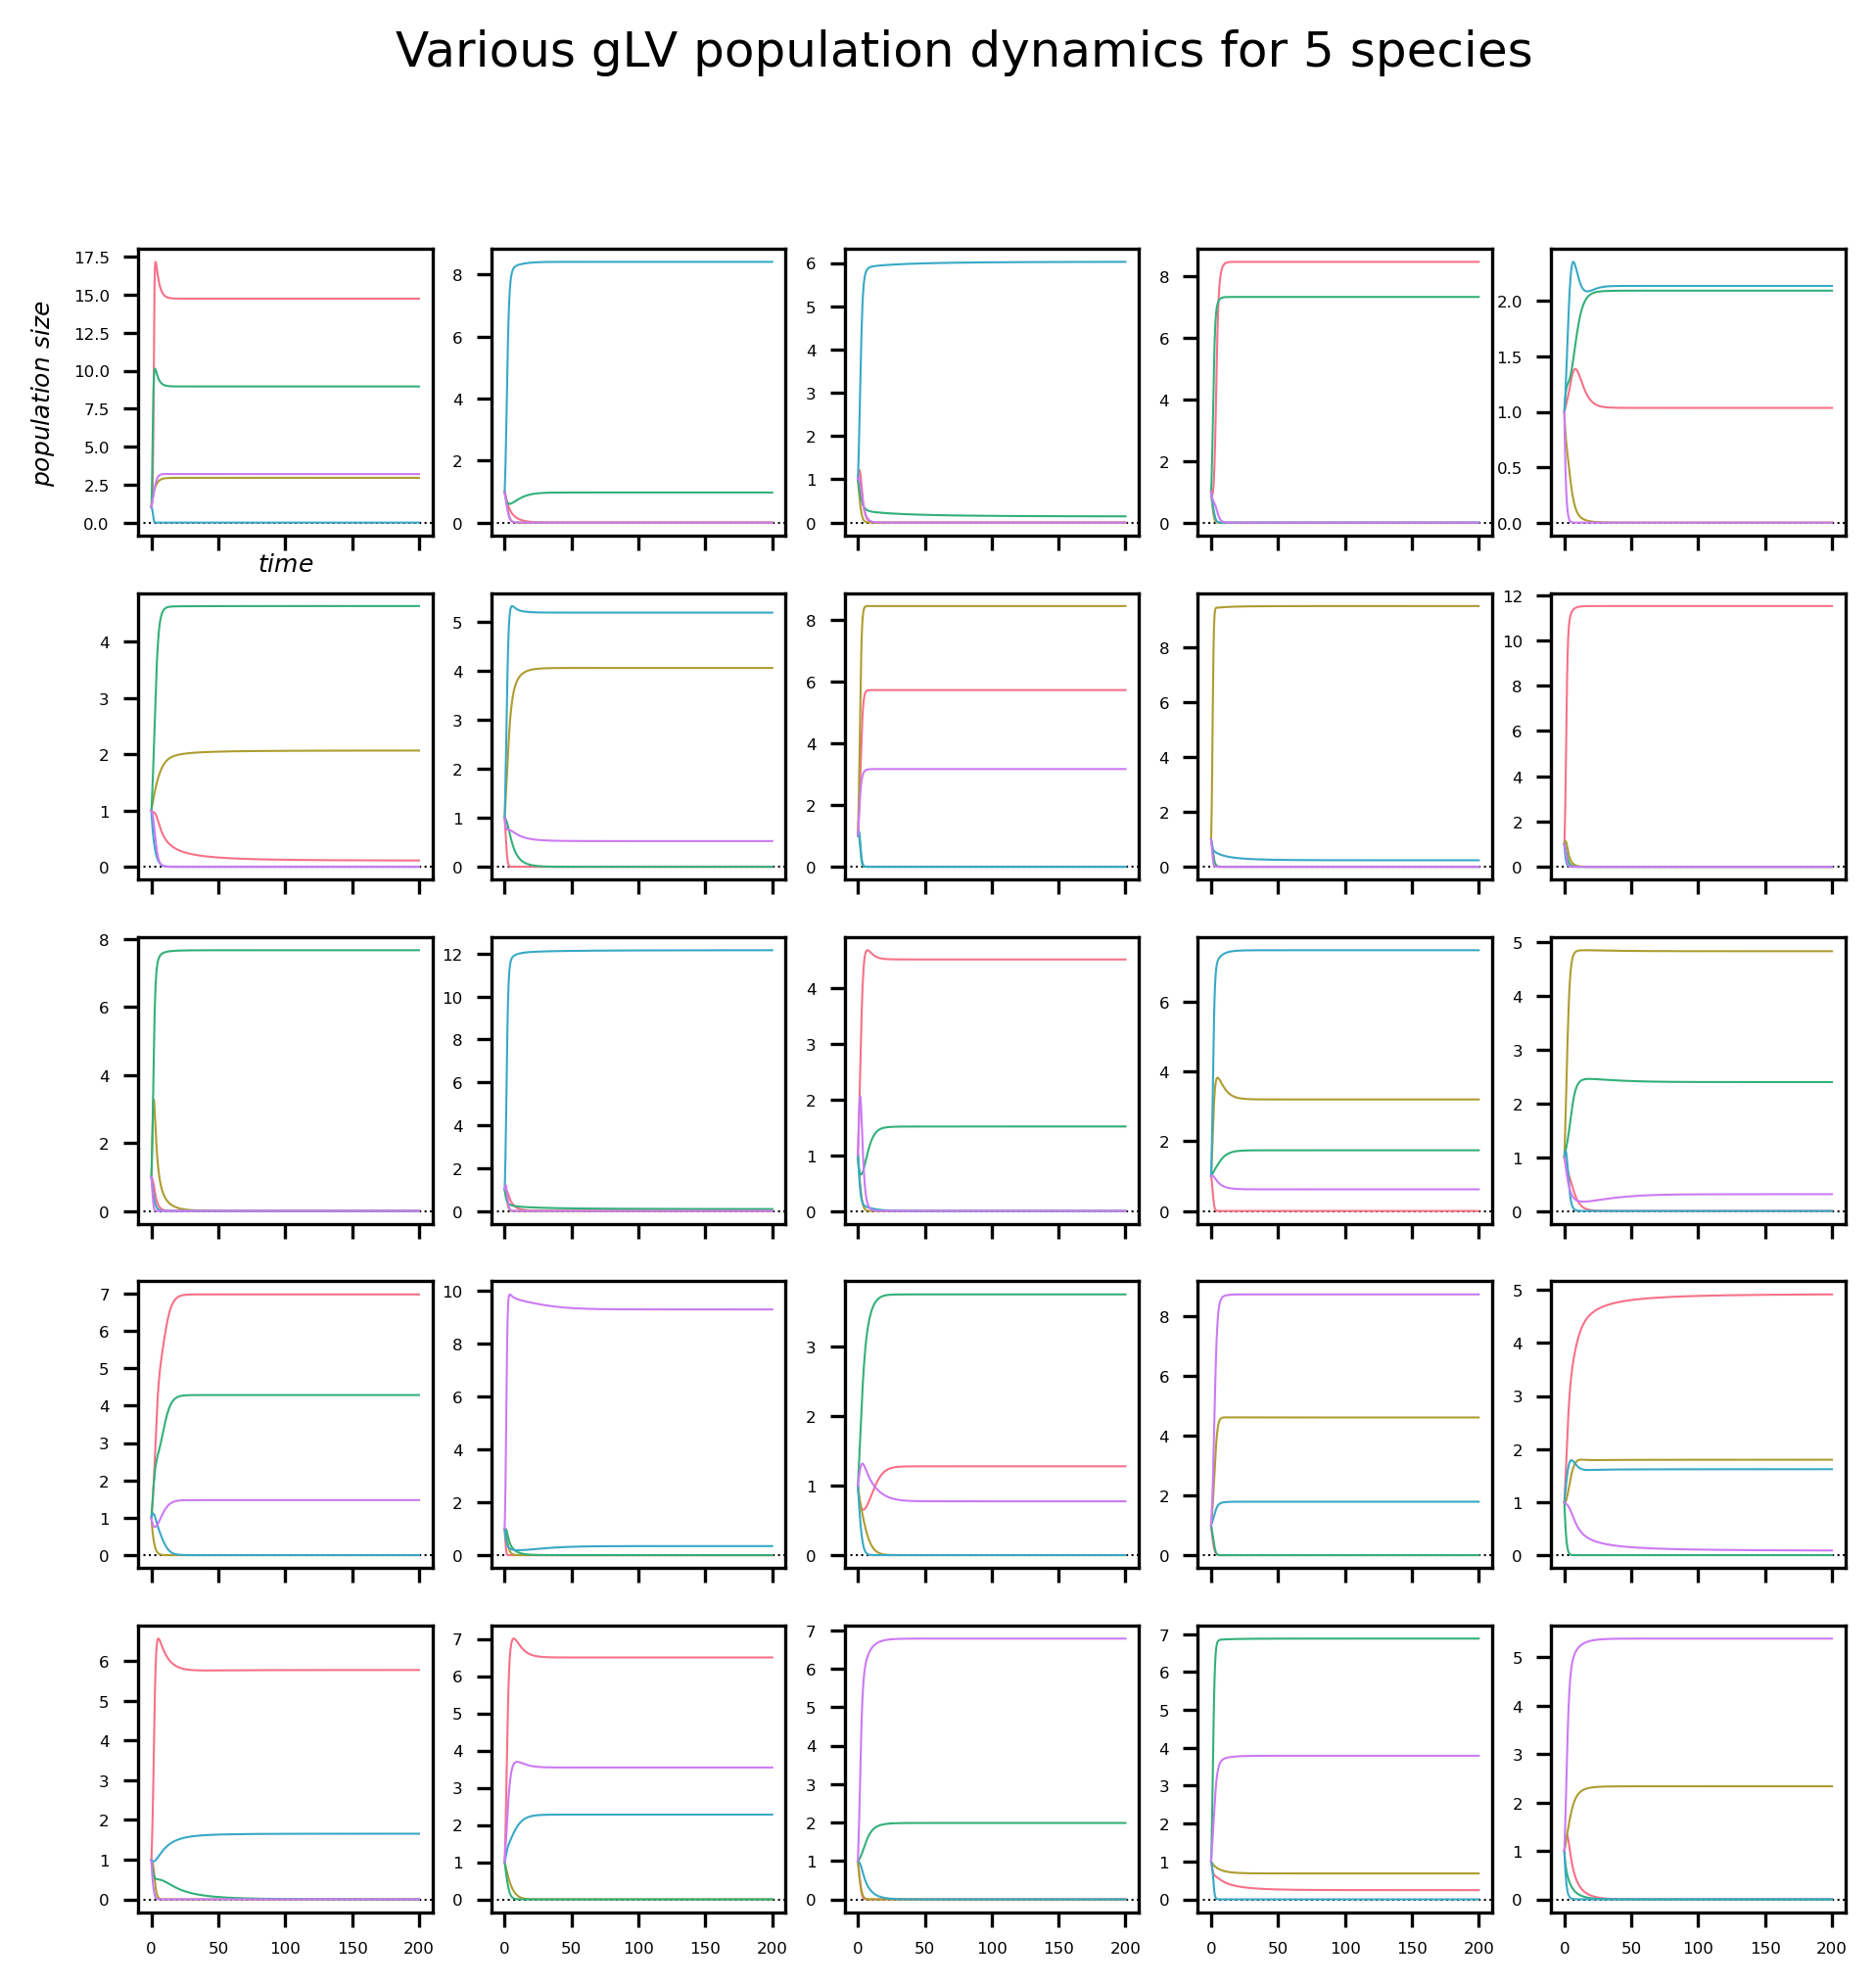

In [16]:
n_figs = 5
sol_grid = example_run(n_figs)
example_plot(sol_grid)

## Détection des communautés viables

Avant de s'intéresser aux cartes d'assemblages, on crée artificiellement une communauté climacique viable.

Pour cela on tire aléatoirement une matrice d'interactions $A$, et on tire également aléatoirement les effectifs à l'équilibre pour chacune des $n$ espèces (vecteur $X^*$). Les effectifs sont tels que la population totale est inférieure à $K^T$, donc $\mu = 0$. On retrouve ensuite les taux de croissance intrinsèques associés, car à l'équilibre: $r = -AX^*$.

In [17]:
def random_climax_community(n):
    
    a = communaute(n, PM, C)
    X_ = np.random.uniform(0, 1, n)
    
    r = - np.dot(a, X_)
    
    return r, a, X_


Ensuite on calcule les valeurs propres de la jacobienne du système, et on détermine la stabilité de l'équilibre $X^*$. 

En posant $\frac{\mathrm{d}X_i}{\mathrm{d}t} = f(X_1, X_2, ..., X_i, ...., X_s)$, l'expression générale des coefficients de la jacobienne est la suivante:

$$
\left\{
\begin{aligned}
J_{i,\,j,\,\,j \ne i} &= a_{i,j}X_i^*\\
J_{i,\,i} &= r_i + 2a_{i,i}X_i^* + \sum_{j=1,\,j\ne i}^{S} a_{i, j}X_j^*
\end{aligned}
\right.
$$

In [18]:
def Check_equilibrium(r, a, X_):
    
    n = len(r)
    stability = True
    
    jacob = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            
            if i != j:
                jacob[i, j] = a[i, j] * X_[i]
            else:
                jacob[i, j] = r[i] + a[i, j] * X_[i] + np.sum(a[i]*X_)
    
    eigen_vals_re = np.linalg.eig(jacob)[0].real
    
    if max(eigen_vals_re) > 0:
        stability = False
    
    return jacob, stability

On répète les opérations précédentes jusqu'à obtenir une communauté viable, c'est à dire une communauté où l'équilibre $X^*$ est stable.

In [20]:
def select_stable_com(n, max_iter = 100000):
    
    stability = False
    iters = 0
    
    while not stability:
        
        r, a, X_ = random_climax_community(n)
        jacob, stability = Check_equilibrium(r, a, X_)
        iters += 1
        
        if iters > max_iter:
            print('Too long')
            break
    
    return r, a, X_, jacob

[0.55611592 0.95140286 0.31576036 0.55335161 0.38697524 0.90708468]


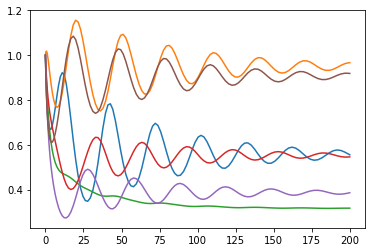

In [38]:
n_species = 6
r, a, X_, jacob = select_stable_com(n_species)
print(X_)

sol = solve_ivp(gLV, T, np.ones(n_species), method = 'RK45', args = ((KT, r, a), ),
                   t_eval = None,
                   rtol = 1e-06,
                   atol = 1e-12)

[plt.plot(sol.t, sol.y[i]) for i in range(n_species)]
plt.show()

## Carte d'assemblage de la communauté viable


Dans cette partie nous implémentons le modèle de construction des cartes d'assemblage en nous aidant de l'annexe 1 de l'article de référence. Cette dernière détaille l'algorithme construit par les chercheurs. Pour des raisons de concisions nous ne suivrons pas la démarche complète, et nous arrêterons 

In [39]:
id_espece = [i for i in range(n_species)]
combinaisons = [[list(subset) for subset in itt.combinations(id_espece, taille_commu)] \
                for taille_commu in range(1, n_species + 1)]

pops_finales = [[] for i in range(n_species)]
coexistence_grid = [[] for i in range(n_species)]
stability_grid = [[] for i in range(n_species)]

def map_construction(KT, r, a, X, n):
    
    for taille_commu in range(0, n):
        
        Nb_comb = len(combinaisons[taille_commu])
        for comb in range(Nb_comb):
            
            r_comb = r[combinaisons[taille_commu][comb]]
            taille_a = taille_commu + 1
            a_comb = np.zeros((taille_a, taille_a))
            
            for i in range(taille_a):
                for j in range(taille_a):
                    a_comb[i, j] = a[combinaisons[taille_commu][comb][i], combinaisons[taille_commu][comb][j]]
            
            a_comb_inv = np.linalg.inv(a_comb)
            X_comb = - np.dot(a_comb_inv, r_comb)
            
            coexistence = X_comb > 0
            _, stability = Check_equilibrium(r_comb, a_comb, X_comb)
            
            pops_finales[taille_commu].append(X_comb)
            
            if False in coexistence:
                coexistence_grid[taille_commu].append(False)
            else:
                coexistence_grid[taille_commu].append(True)
                
            if stability:
                stability_grid[taille_commu].append(True)
            else:
                stability_grid[taille_commu].append(False)

    return pops_finales, coexistence_grid, stability_grid

pops_finales, coexistence_grid, stability_grid = map_construction(KT, r, a, X_, n_species)

## Affichage des résultats

Cette partie est un supplément, et permet simplement de visualiser les données obtenues via la fonction map_construction.

In [40]:
color_palette = set_color_palette(n_species)

def drawPieMarker(xs, ys, ratios, sizes, colors, coexistence, stability):
    
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
       
        if coexistence:
            if stability:
                markers.append({'marker':xy, 's':np.array(sizes) * 1.25, 'facecolor': 'black'})
            markers.append({'marker':xy, 's':np.array(sizes), 'facecolor':color})
            
        else:
            markers.append({'marker':xy, 's': 5, 'facecolor':'red'})
            
    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker)

In [41]:
x_grid = [[[0.0]]]
y_grid = [[[0.0]]]
size_grid = [[300]]
ratio_grid = [[[1.0]]]
color_grid = [[['grey']]]

coexistence_grid = [[True]] + coexistence_grid
stability_grid = [[False]] + stability_grid

x_increment = 2
y_increment = 1

for absc, (list_el, n_combs) in enumerate(zip(pops_finales, combinaisons)):
    shift = len(list_el)
    x_grid.append([[x_increment * (absc + 1)] for ordn in range(shift)])
    y_grid.append([[y_increment * (ordn - (shift-1)/2)] for ordn in range(shift)])
    size_grid.append([ (sum(pops) * 800 / (n_species)**2) + 10 for pops in list_el])
    ratio_grid.append([[bact / sum(pops) for bact in pops] for pops in list_el])
    color_grid.append([[color_palette[species] for species in species_comb] for species_comb in n_combs])

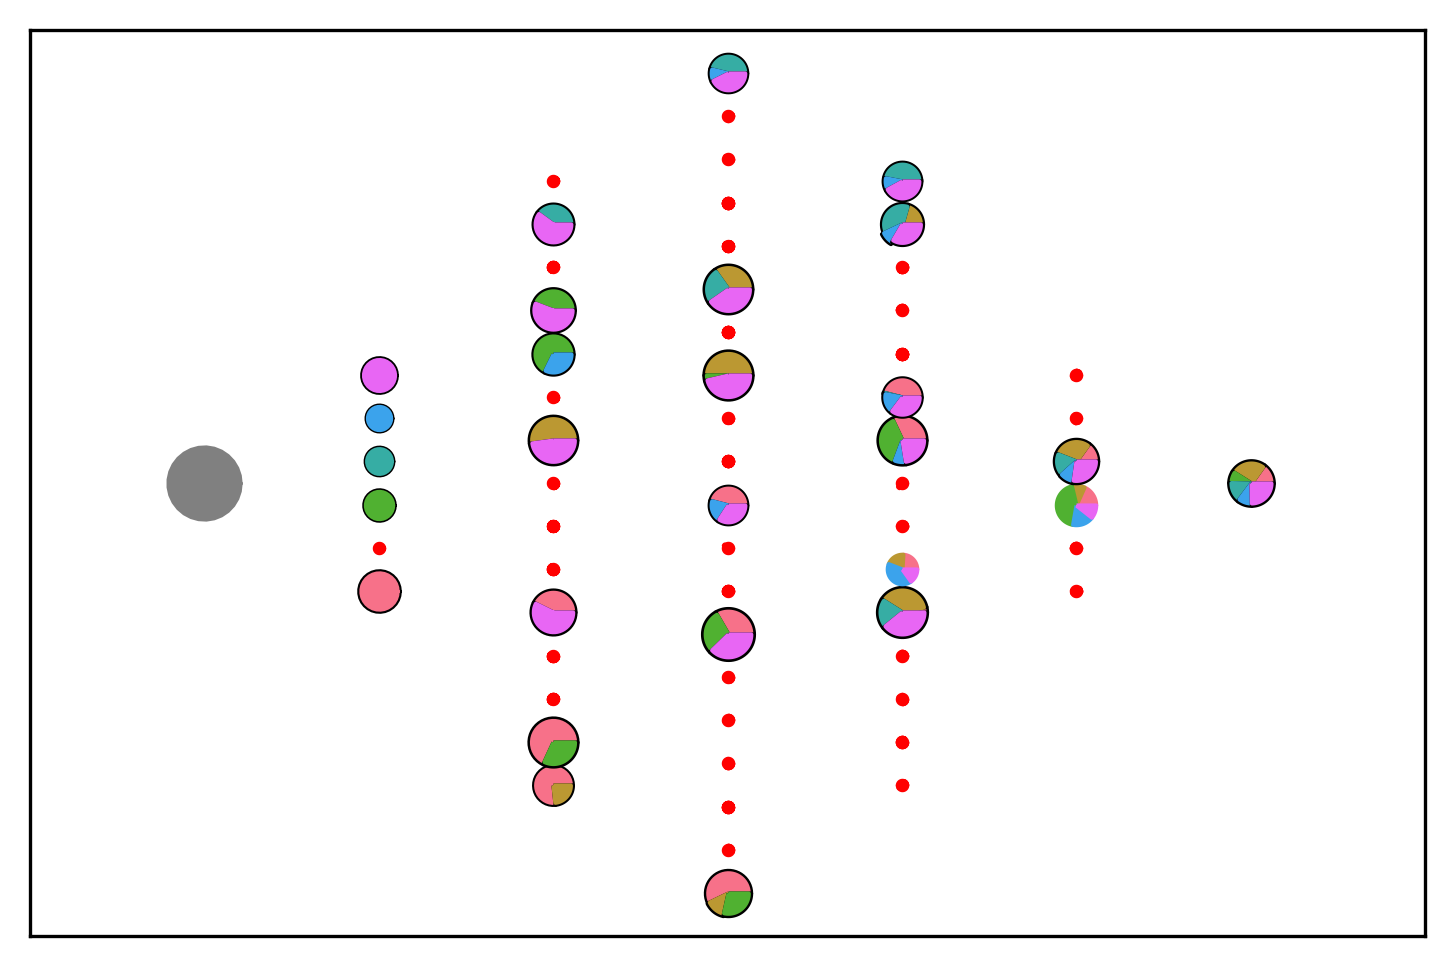

In [42]:
x_lim = 0
y_lim = 0 

fig, ax = plt.subplots()
fig.dpi = 300

for absc in range(len(pops_finales) + 1):
    for xs, ys, ratios, sizes, colors, coexistence, stability in zip(x_grid[absc], 
                                              y_grid[absc], 
                                              ratio_grid[absc], 
                                              size_grid[absc], 
                                              color_grid[absc],
                                              coexistence_grid[absc],
                                              stability_grid[absc]):
        
        x_templim = max(abs(max(xs)), abs(min(xs)))
        y_templim = max(abs(max(ys)), abs(min(ys)))
        
        if x_templim > x_lim:
            x_lim = x_templim
        if y_templim > y_lim:
            y_lim = y_templim

        drawPieMarker(xs, 
                      ys,
                      ratios,
                      sizes,
                      colors,
                      coexistence,
                      stability)
        

ax.set_xlim(- x_increment, x_lim + x_increment)
y_lim = y_lim + y_increment
ax.set_ylim(-y_lim, y_lim)
ax.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)

# fig.savefig('run_model.png', bbox_inches='tight', dpi = 300)

# Discussion

L’équation généralisée de Lotka-Volterra (gLV) est très intéressante, d’abord par sa simplicité, mais aussi parce qu’elle permet de prendre en compte simultanément un grand nombre d’interactions de types très variés (compétitive, coopérative, commensale…). Cette équation est donc très utilisée pour modéliser des communautés macro et microscopique. Elle est particulièrement pertinente dans le cas du microbiote, où les interactions sont à la fois nombreuses et variées. Ici, elle permet donc de modéliser de grandes communautés et de chercher des principes généraux. 
En revanche, les modèles gLV peuvent être critiqués pour leur trop grande simplicité qui peut donner pour résultat des propriétés irréalistes au modèle. Par exemple, dans le cas d’une interaction mutualiste (+/+) d’intensité élevée, les équations de base prédisent une croissance infinie des populations. Le modèle de base prend donc mal en compte les interactions coopératives très fortes, c’est pour cela que les auteurs ajoutent une limite $K^T$ au delà de laquelle les taux de croissance effectif des populations sont modifiés. 
Une autre critique des modèles gLV est qu’ils prennent directement en compte l’effet d’une espèce A sur une espèce B en ignorant totalement le mécanisme sous-jacent de cet effet. Ce peut être le cas si une espèce A de bactérie permet la décomposition de glucides et qu’une autre espèce B en profite. 
Cela nous amène sur une troisième critique, les modèles gLV ne prennent pas en compte l’effet de l’environnement et le fait que les relations peuvent varier au cours du temps. Par exemple, s’il n’y a pas de glucide, l’interaction positive de A sur B n’existe pas. 

Le modèle développé ici a pour but de trouver des principes généraux quant à l’assemblage des communautés du microbiote selon les interactions entre microorganismes. Le modèle utilisé est assez simple et permet d’apporter de nombreuses réponses, plutôt cohérente avec des observations faites chez de jeunes enfants. En revanche, il ne faut pas oublier que ce modèle se concentre sur les interactions entre micro-organismes et ignore de nombreux autres paramètres qui pourraient influencer l’assemblage du microbiote (plasticité métabolique, dynamique des interactions, interaction avec l’hôte…). 
Le modèle prend en compte la présence ou absence de nourriture en ajoutant un paramètre constant dans l’équation. Cette façon de prendre en compte l’apport de nutriments est assez simpliste, car les effets des nutriments varient selon les microorganismes et selon le nutriment en question. 

Toutefois, avec un modèle assez simple à mettre en place, les auteurs arrivent à modéliser l’assemblage des communautés bactériennes du microbiote et à faire le lien avec des données expérimentales. 